In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
hl = np.array([1,2,3])
hu = np.array([100,200,300])
val_err_relu = np.zeros([hl.shape[0], hu.shape[0]])    
val_err_sig = np.zeros([hl.shape[0], hu.shape[0]]) 

In [3]:
#W/O BNDP

for li,l in enumerate(hl):
    for ui,u in enumerate(hu):
        a=np.load('results/wo_BNDP/mse_relu_l'+str(l)+'_u'+str(u)+'.npy')
        val_err_relu[li,ui] = min(a[:,1])
        
for li,l in enumerate(hl):
    for ui,u in enumerate(hu):
        a=np.load('results/wo_BNDP/mse_sigmoid_l'+str(l)+'_u'+str(u)+'.npy')
        val_err_sig[li,ui] = min(a[:,1])

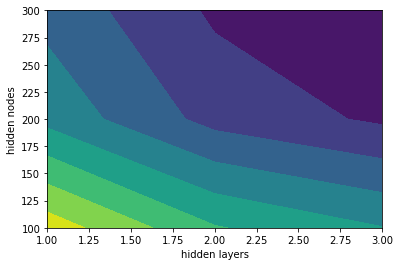

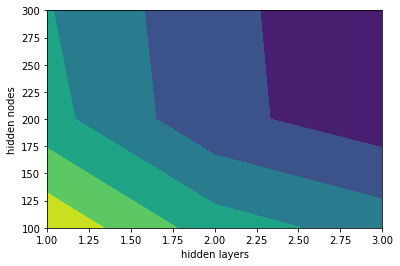

In [4]:
#relu
plt.figure
plt.contourf(hl, hu, val_err_relu)
plt.xlabel('hidden layers')
plt.ylabel('hidden nodes')
plt.show()

#sigmoid
plt.figure
plt.contourf(hl, hu, val_err_sig)
plt.xlabel('hidden layers')
plt.ylabel('hidden nodes')
plt.show()

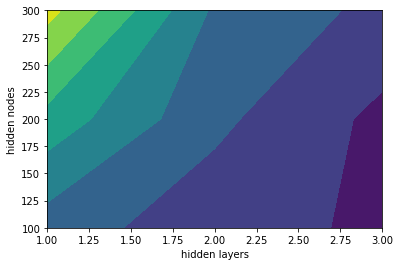

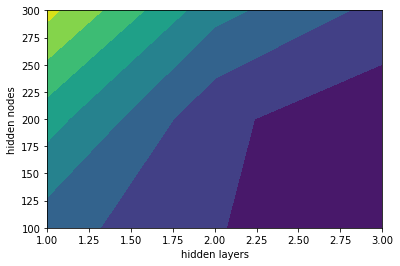

In [8]:
#W BNDP
hl = np.array([1,2,3])
hu = np.array([100,200,300])
val_err_relu = np.zeros([hl.shape[0], hu.shape[0]])    
val_err_sig = np.zeros([hl.shape[0], hu.shape[0]]) 

for li,l in enumerate(hl):
    for ui,u in enumerate(hu):
        a=np.load('results/w_BNDP/mse_relu_l'+str(l)+'_u'+str(u)+'.npy')
        val_err_relu[li,ui] = min(a[:,1])
        
for li,l in enumerate(hl):
    for ui,u in enumerate(hu):
        a=np.load('results/w_BNDP/mse_sigmoid_l'+str(l)+'_u'+str(u)+'.npy')
        val_err_sig[li,ui] = min(a[:,1])

#relu
plt.figure
plt.contourf(hl, hu, val_err_relu)
plt.xlabel('hidden layers')
plt.ylabel('hidden nodes')
plt.show()

# #sigmoid
plt.figure
plt.contourf(hl, hu, val_err_sig)
plt.xlabel('hidden layers')
plt.ylabel('hidden nodes')
plt.show()

In [6]:
print('Relu:','\n',val_err_relu,'\n','Sigmoid:','\n', val_err_sig)
# Choose l:2 u:300 a:sigmoid
bm = np.load('results/w_BNDP/mse_sigmoid_l2_u300.npy')

Relu: 
 [[0.44047161 0.35171632 0.30595081]
 [0.60995223 0.41795006 0.29973036]
 [0.83069833 0.46553008 0.37902003]] 
 Sigmoid: 
 [[0.43571874 0.3231475  0.27807145]
 [0.59300819 0.33718863 0.26485754]
 [0.82426155 0.50611224 0.37421718]]


In [7]:
ind = np.argmin(bm[:,1])
print('Train MSE: ',bm[ind,0],'\nTest MSE: ',bm[ind,1])

#Same model w/o BN-DP
bm_no = np.load('results/wo_BNDP/mse_sigmoid_l2_u300.npy')
ind = np.argmin(bm_no[:,1])
print('\nWithout BN-DP:')
print('Train MSE: ',bm_no[ind,0],'\nTest MSE: ',bm_no[ind,1])

Train MSE:  0.900344452790654 
Test MSE:  0.26485754018634805

Without BN-DP:
Train MSE:  0.054008410556015594 
Test MSE:  0.05166589621614408


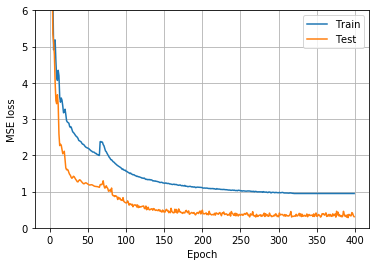

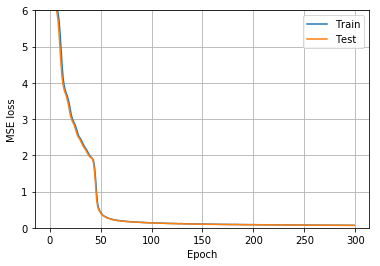

In [33]:
# With BN-DP
plt.figure()
plt.plot(bm[:400,0])
plt.plot(bm[:400,1])
plt.legend(['Train','Test'])
plt.xlabel('Epoch')
plt.ylabel('MSE loss')
plt.ylim(0,6)
plt.grid()

#Without BN-DP
plt.figure()
plt.plot(bm_no[:300,0])
plt.plot(bm_no[:300,1])
plt.legend(['Train','Test'])
plt.xlabel('Epoch')
plt.ylabel('MSE loss')
plt.ylim(0,6)
plt.grid()

In [34]:
bm_t = np.load('results/w_BNDP/mse_sigmoid_l2_u300_t3.npy')
ind = np.argmin(bm_t[:,1])
print('With BN-DP:')
print('Train MSE: ',bm_t[ind,0],'\nTest MSE: ',bm_t[ind,1])

bm_t = np.load('results/wo_BNDP/mse_sigmoid_l2_u300_t3.npy')
ind = np.argmin(bm_t[:,1])
print('\nWithout BN-DP:')
print('Train MSE: ',bm_t[ind,0],'\nTest MSE: ',bm_t[ind,1])

With BN-DP:
Train MSE:  0.49958907145561116 
Test MSE:  1.7250580183972342

Without BN-DP:
Train MSE:  0.08028687135964266 
Test MSE:  1.7953806200106814
